In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors # окрашивает точки

In [2]:
# функция, которая позволяет присваивать различные цвета различным объектам
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [20]:
wine = load_wine()

In [21]:
print(wine.DESCR) # описание датасета

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [22]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names) # feature_names - объект 
data_class = wine.target

In [23]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [24]:
data_class # target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## LDA (дискриминантный анализ)

In [25]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.25) # вот где используется data_class

In [26]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [27]:
lda = LinearDiscriminantAnalysis()

In [28]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [29]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2,
       0])

In [30]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [31]:
result # первый столбец - отложенные целевые значения, второй - наш прошноз на основе тестовых данных

,0,1
0,2,2
1,1,1
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,2,2
9,0,0


In [32]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [34]:
# коэффициенты дискриминатных линий (по сути, веса разных признаков модели)
# разбиты по категориям
lda.coef_

array([[ 2.75279046e+00, -2.15048521e-01,  4.37050434e+00,
        -6.00469769e-01, -1.10361572e-03, -1.40136903e+00,
         4.78832374e+00,  1.73507349e+00, -9.23211963e-01,
        -1.02571320e+00,  8.29361408e-01,  4.18390018e+00,
         1.61198185e-02],
       [-1.91046286e+00, -7.45058684e-01, -5.47597409e+00,
         2.92648000e-01,  4.29590688e-03, -1.21669484e-01,
         1.45394884e+00,  5.52282432e+00,  6.53603212e-01,
        -6.50205163e-01,  2.65791861e+00,  2.27898896e-01,
        -5.97508913e-03],
       [-4.62579959e-01,  1.31716748e+00,  2.76472812e+00,
         2.78644759e-01, -4.87101591e-03,  1.80290137e+00,
        -7.64749214e+00, -9.92750944e+00,  1.36679572e-01,
         2.12342004e+00, -4.77114126e+00, -5.18882024e+00,
        -1.01749317e-02]])

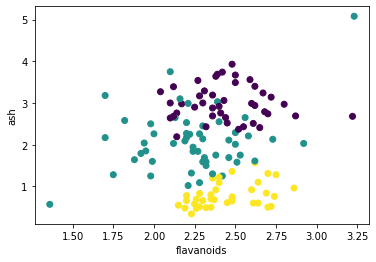

In [35]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.ylabel('ash')
plt.xlabel('flavanoids')
plt.show()

In [39]:
# выделяем только две категории
# X_train
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
# y_train
sy_train = y_train[(y_train == 0) | (y_train == 2)]

# X_test
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
# y_test
sy_test = y_test[(y_test == 0) | (y_test == 2)]

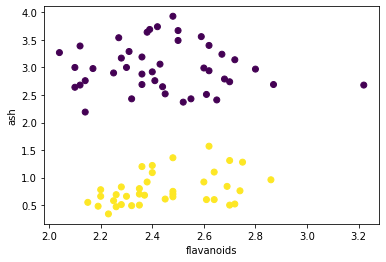

In [40]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.ylabel('ash')
plt.xlabel('flavanoids')
plt.show()

In [41]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [42]:
# посмотрим на наши центроиды (центры групп)
lda_small.means_

array([[2.44093023, 2.99837209],
       [2.44648649, 0.78864865]])

Text(0.5, 0, 'flavanoids')

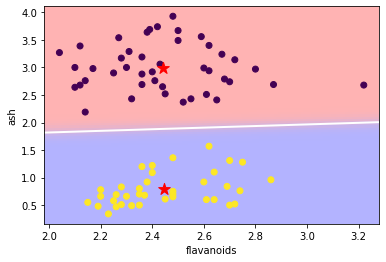

In [47]:
## Отображение модели

# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.ylabel('ash')
plt.xlabel('flavanoids')

In [1]:
lda_small.coef_

NameError: name 'lda_small' is not defined

**Вывод:** 
Второй признак в 17 раз важнее первого для категоризации (это видно по визуализации)
То есть ash в 17 раз значимее, чем flavanoids
Нам гораздо важнее, где точка находится по y (ash), чем по x
Если бы оба признака были одинаково важны для классификации, то дискриминантная функция была бы диагональю

In [44]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

## Logistic regression

In [24]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [51]:
lr.predict(small_test)

array([2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 0])

In [52]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [53]:
lr.coef_

array([[ 0.13178205, -3.11837095]])

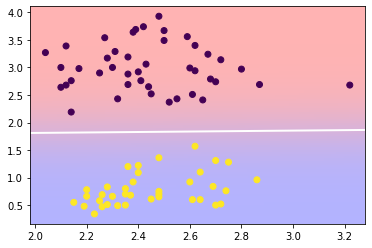

In [54]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [3]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [4]:
# 200 точек с 2 центрами, СКО - 2.5
# самостоятельно генерируем данные без Y, потому что без учителя
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [5]:
X

array([[-3.15735318e+00, -2.18155987e+00],
       [ 7.13988676e+00,  6.49702109e+00],
       [ 2.84773212e+00,  7.25707432e-01],
       [-8.82131403e+00, -2.07517627e+00],
       [ 3.56139908e+00,  4.86786624e-01],
       [ 4.89542656e-04, -1.10155291e+00],
       [-7.58907912e+00, -2.76465005e+00],
       [ 4.40683322e+00,  2.59260889e+00],
       [-3.30711991e+00, -1.68625985e-01],
       [-1.15798481e+00, -9.66292663e-02],
       [-8.15783362e+00, -3.12243033e+00],
       [-6.73000807e+00, -4.72749325e+00],
       [ 3.84694681e-01,  5.51800359e+00],
       [ 1.42870887e+00,  2.14769427e+00],
       [ 4.37358342e+00,  5.00169399e+00],
       [-4.82227919e+00, -3.28535845e+00],
       [ 6.66441476e+00,  4.09566912e+00],
       [ 6.42945506e+00,  6.77702591e+00],
       [ 2.72708025e+00,  2.30438250e+00],
       [ 4.98623122e+00,  8.30143869e-01],
       [-5.77757619e+00, -5.32751914e+00],
       [ 6.94791174e+00,  3.28719097e+00],
       [-2.87641088e+00,  5.12370538e+00],
       [ 5.

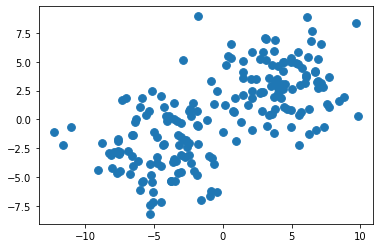

In [6]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)
# масштаб (-10 до 10 и -7.5 до 7.5)

In [7]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [8]:
# создаем объект класса StandardScaler
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test (при обучении с учителем) нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [9]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

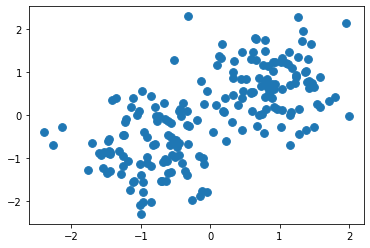

In [16]:
# масштаб признаков существенно изменился (-2 до 2)
# трансформация влияет на все объекты одинаково
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [18]:
from sklearn.cluster import KMeans

In [19]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

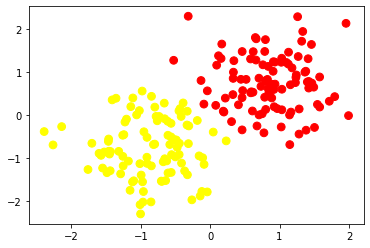

In [13]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [20]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

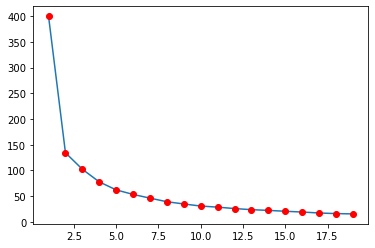

In [21]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

## Иерархическая кластеризация

In [22]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

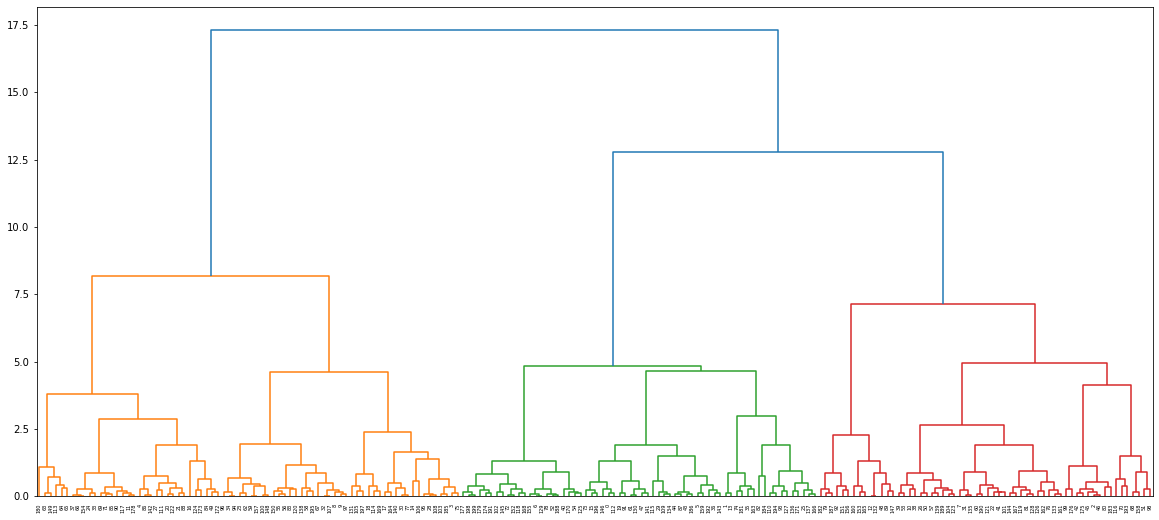

In [49]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward') # расстояние по методу Уорда, по умолчанию по методу ближних
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [23]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering # agglomerative == hierarchical?

In [24]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

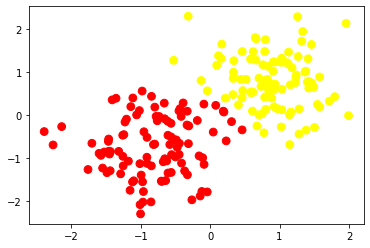

In [25]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)